## Praca domowa 4

#### Autor: Hubert Bujakowski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

### a)

In [2]:
df.loc[(df.Year>2015) & (df.NA_Sales<df.EU_Sales) & (df.Publisher=='Nintendo')][["Name"]].reset_index(drop = True)

,Name
0,Mario & Sonic at the Rio 2016 Olympic Games
1,Mario & Sonic at the Rio 2016 Olympic Games
2,Teddy Together


### b)

In [3]:
tmp = df.loc[df.Year == 2010]
tmp.groupby(df.Genre).Global_Sales.agg('sum').reset_index().sort_values(ascending = False, by = 'Global_Sales').head(1)

,Genre,Global_Sales
0,Action,117.64


### c)

In [4]:
tmp = df.groupby('Genre').mean().reset_index()
tmp = tmp.loc[tmp.JP_Sales > tmp.EU_Sales][['Genre', 'JP_Sales']]
tmp.columns = ['Typ gry', 'Średnia sprzedaż w Japonii']
tmp.sort_values(ascending=False, by = 'Średnia sprzedaż w Japonii').reset_index(drop = True)

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv('danee.csv', sep=';')

### Oryginalny wykres
wykres nr1

![image](1.png)

źródło: https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparcie-wzroslo-wszystkim-tylko-nie-konfederacji-i-psl

### Wykres w ggplot2
wykres nr2

![image](2.png)

źródło: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/JakubowskiWiktor/JakubowskiWiktor.pdf

### Poprawiony wykres
wykres nr3

In [6]:
df2

,Partia,proc
0,PiS,36
1,Koalicja Obywatelska,25
2,Polska 2050,14
3,Lewica,9
4,Konfederacja,5
5,PSL,5
6,nie wiem,6


<function matplotlib.pyplot.show(*args, **kw)>

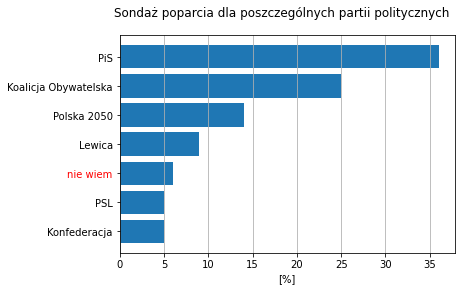

In [7]:
df2 = df2.sort_values(ascending = True, by='proc')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.barh(df2.Partia, df2.proc)
fig.suptitle("Sondaż poparcia dla poszczególnych partii politycznych")
ax.set(xlabel = "[%]")
plt.grid(axis = 'x')
plt.gca().get_yticklabels()[2].set_color('red')
plt.show

### Podsumowanie

Dane przedstawione na oryginalnym wykresie nie są dość czytelne, głównie poprzez zastosowany wykres kołowy.
Wyższość wykresu nr2 nad wykresem nr1 jest opisana w pracy https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/JakubowskiWiktor/JakubowskiWiktor.pdf.

Natomiast wykres napisany w pythonie deklasuje wspomniany wyżej wykres m.in. poprzez usunięcie koloru kolumn (kolor nie wnosi żadnej informacji). Dodatkowo zmieniony został kolor napisu 'nie wiem' na czerwony aby wyróżniał się on spośród partii politycznych.